In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# function to print the size of the dataframe
def print_df_size(name, df):
	print(name, f"- shape: {df.shape} --> {df.shape[0]} rows and {df.shape[1]} columns")

In [3]:
# rename the columns for better readability
movie_headers = ["Wikipedia movie ID", "Freebase movie ID", "Movie name", "Movie release date", "Movie box office revenue", "Movie runtime", "Movie languages", "Movie countries", "Movie genres"]
movie_headers = [header.lower().replace(' ', '_') for header in movie_headers]

In [4]:
# Loading the CMU Movie Dataset
movies_df = pd.read_csv("./data/MovieSummaries/movie.metadata.tsv", sep="\t", header=None, names=movie_headers)
print_df_size("MoviesSummaries", movies_df)
movies_df.head(10)

MoviesSummaries - shape: (81741, 9) --> 81741 rows and 9 columns


,wikipedia_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
6,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
8,9997961,/m/06_y2j7,Contigo y aquí,1974,NaN,NaN,"{""/m/06nm1"": ""Spanish Language""}","{""/m/0jgd"": ""Argentina""}","{""/m/04t36"": ""Musical"", ""/m/07s9rl0"": ""Drama"",..."
9,2345652,/m/075f66,City of the Dead,1960,NaN,76.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/03npn"": ""Horror"", ""/m/0fdjb"": ""Supernatur..."


In [5]:
# Loading the TMDB Movie Dataset
tmdb_movies_df = pd.read_csv("./data/TMDBMovies/TMDB_movie_dataset_v11.csv")
print_df_size("TMDB", tmdb_movies_df)
tmdb_movies_df.head()

TMDB - shape: (1139790, 24) --> 1139790 rows and 24 columns


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [6]:
# Loading the Converter Dataset and merging the CMU and TMDB datasets on the freebase ids
query_df = pd.read_csv("./data/Converter/query.csv", sep=',', header=0)
tmdb_with_ids_df = tmdb_movies_df.merge(query_df, how='inner', on='imdb_id')
full_merged = pd.merge(movies_df, tmdb_with_ids_df, left_on='freebase_movie_id', right_on='freebase_id', how='inner')
print_df_size("CMU & TMDB", full_merged)
full_merged

CMU & TMDB - shape: (68433, 34) --> 68433 rows and 34 columns


,wikipedia_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,id,...,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,freebase_id
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",10016,...,"In 2176, a Martian police unit is sent to pick...",14.189,/i2zztssCIbahGES1fdfWFmDXian.jpg,Terror is the same on any planet.,"Action, Horror, Science Fiction","Animationwerks, Screen Gems, Storm King Produc...",United States of America,English,"future, planet mars, anti hero, possession, ho...",/m/03vyhn
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",784579,...,Dramatization of the story behind the murder o...,0.600,NaN,NaN,"Drama, Crime",NaN,United States of America,English,"colorado, jonbenet",/m/08yl5d
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",396302,...,A stolen bicycle case ends with drunken detect...,0.898,/rtFEOQQ0LVDv7y2bCgVVg3wWpXK.jpg,A film about murder and love,"Mystery, Crime, Drama","Filmeffekt AS, Norsk Film",Norway,Norwegian,"bicycle, private detective",/m/0crgdbh
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",33592,...,"In a wealthy and isolated desert community, a ...",8.297,/aLFoGmQpknOvcyx4imCP7Fuvoip.jpg,No woman is safe… while he is loose!,"Horror, Thriller",Mrs. White's Productions,United Kingdom,English,"based on novel or book, gas station, psychopat...",/m/0285_cd
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",11192,...,"Eva, an upper-class housewife, frustratedly le...",2.801,/iKeCVR0x8vnRXLtjwjZ7EuVFlo7.jpg,NaN,Drama,Dieter Geissler Filmproduktion,Germany,German,"jealousy, eroticism, gigolo, longing, dominatr...",/m/01mrr1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68428,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",117124,...,A story that imagines how these real-world phe...,2.728,/xFGoPjzRXSDWUcnpFacrLOo7KF1.jpg,NaN,Science Fiction,DSP,United States of America,English,"mermaid, mockumentary, fake documentary",/m/0j7hxnt
68429,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",71771,...,An epic 12-year journey into the brutal and se...,1.656,/b93xbrz5kVYn5LUgHOznkaf5BvH.jpg,Twelve years. Three clans. One war.,Documentary,"Fís Éireann/Screen Ireland, Rise Films, BBC St...",Ireland,English,"sports, bare knuckle boxing, fistfight",/m/0g4pl34
68430,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",285337,...,Nixon and Agnew played as Laurel and Hardy.,2.087,/pEbRbvMjFsTYcFGPuIwuscwxixJ.jpg,America's funniest comedy team of the decade.....,Comedy,Smo-Bro International Productions,United States of America,English,NaN,/m/02pygw1
68431,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/

In [7]:
# Dropping unnecessary columns
columns_to_drop = [
    "wikipedia_movie_id",
    "movie_runtime",
    "movie_languages",
    "title",
    "status",
    "runtime",
    "adult",
    "backdrop_path",
    "budget",
    "homepage",
    "original_language",
    "original_title",
    "overview",
    "poster_path",
    "tagline",
    "production_companies",
    "spoken_languages",
    "keywords",
    "freebase_id",
    "id",
    "imdb_id"
]
full_reduced = full_merged.drop(columns=columns_to_drop)
full_reduced

,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_countries,movie_genres,vote_average,vote_count,release_date,revenue,popularity,genres,production_countries
0,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",5.127,977,2001-08-24,14010832,14.189,"Action, Horror, Science Fiction",United States of America
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,"{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",0.000,0,2000-02-16,0,0.600,"Drama, Crime",United States of America
2,/m/0crgdbh,Brun bitter,1988,NaN,"{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",0.000,0,1988-11-17,0,0.898,"Mystery, Crime, Drama",Norway
3,/m/0285_cd,White Of The Eye,1987,NaN,"{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",5.742,64,1987-06-19,0,8.297,"Horror, Thriller",United Kingdom
4,/m/01mrr1,A Woman in Flames,1983,NaN,"{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",5.300,13,1983-05-11,0,2.801,Drama,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68428,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,"{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",4.500,20,2011-03-19,0,2.728,Science Fiction,United States of America
68429,/m/0g4pl34,Knuckle,2011-01-21,NaN,"{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",5.700,28,2011-12-09,0,1.656,Documentary,Ireland
68430,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,"{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",0.000,0,1972-08-23,0,2.087,Comedy,United States of America
68431,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,"{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",0.000,0,1992-05-21,0,0.600,"Action, Comedy, Animation, Fantasy, Science Fi...",Japan


In [8]:
# Cleaning the columns that contain dictionaries
full_reduced["movie_countries_cleaned"] = full_reduced["movie_countries"].apply(lambda x: list(dict(eval(x)).values()))
full_reduced["movie_genres_cleaned"] = full_reduced["movie_genres"].apply(lambda x: list(dict(eval(x)).values()))
full_reduced["movie_countries_cleaned"] = full_reduced["movie_countries_cleaned"].apply(lambda x: np.nan if x == [] else ', '.join(map(str, x)) if isinstance(x, list) else x)
full_reduced["movie_genres_cleaned"] = full_reduced["movie_genres_cleaned"].apply(lambda x: np.nan if x == [] else ', '.join(map(str, x)) if isinstance(x, list) else x)
full_reduced

,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_countries,movie_genres,vote_average,vote_count,release_date,revenue,popularity,genres,production_countries,movie_countries_cleaned,movie_genres_cleaned
0,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",5.127,977,2001-08-24,14010832,14.189,"Action, Horror, Science Fiction",United States of America,United States of America,"Thriller, Science Fiction, Horror, Adventure, ..."
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,"{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",0.000,0,2000-02-16,0,0.600,"Drama, Crime",United States of America,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
2,/m/0crgdbh,Brun bitter,1988,NaN,"{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",0.000,0,1988-11-17,0,0.898,"Mystery, Crime, Drama",Norway,Norway,"Crime Fiction, Drama"
3,/m/0285_cd,White Of The Eye,1987,NaN,"{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",5.742,64,1987-06-19,0,8.297,"Horror, Thriller",United Kingdom,United Kingdom,"Thriller, Erotic thriller, Psychological thriller"
4,/m/01mrr1,A Woman in Flames,1983,NaN,"{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",5.300,13,1983-05-11,0,2.801,Drama,Germany,Germany,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68428,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,"{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",4.500,20,2011-03-19,0,2.728,Science Fiction,United States of America,United States of America,Drama
68429,/m/0g4pl34,Knuckle,2011-01-21,NaN,"{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",5.700,28,2011-12-09,0,1.656,Documentary,Ireland,"Ireland, United Kingdom","Biographical film, Drama, Documentary"
68430,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,"{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",0.000,0,1972-08-23,0,2.087,Comedy,United States of America,United States of America,"Satire, Comedy"
68431,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,"{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",0.000,0,1992-05-21,0,0.600,"Action, Comedy, Animation, Fantasy, Science Fi...",Japan,Japan,"Science Fiction, Japanese Movies, Adventure, A..."


In [9]:
# Combining and dropping the original columns
full_reduced['movie_countries_final'] = full_reduced['movie_countries_cleaned'].combine_first(full_reduced['production_countries'])
full_reduced['movie_genres_final'] = full_reduced['movie_genres_cleaned'].combine_first(full_reduced['genres'])
columns_to_drop = ['movie_countries_cleaned', 'production_countries', "movie_countries", 'movie_genres_cleaned', 'movie_genres', 'genres']
full_reduced.drop(columns=columns_to_drop, inplace=True)
full_reduced

,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,vote_average,vote_count,release_date,revenue,popularity,movie_countries_final,movie_genres_final
0,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,5.127,977,2001-08-24,14010832,14.189,United States of America,"Thriller, Science Fiction, Horror, Adventure, ..."
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0.000,0,2000-02-16,0,0.600,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
2,/m/0crgdbh,Brun bitter,1988,NaN,0.000,0,1988-11-17,0,0.898,Norway,"Crime Fiction, Drama"
3,/m/0285_cd,White Of The Eye,1987,NaN,5.742,64,1987-06-19,0,8.297,United Kingdom,"Thriller, Erotic thriller, Psychological thriller"
4,/m/01mrr1,A Woman in Flames,1983,NaN,5.300,13,1983-05-11,0,2.801,Germany,Drama
...,...,...,...,...,...,...,...,...,...,...,...
68428,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,4.500,20,2011-03-19,0,2.728,United States of America,Drama
68429,/m/0g4pl34,Knuckle,2011-01-21,NaN,5.700,28,2011-12-09,0,1.656,"Ireland, United Kingdom","Biographical film, Drama, Documentary"
68430,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,0.000,0,1972-08-23,0,2.087,United States of America,"Satire, Comedy"
68431,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,0.000,0,1992-05-21,0,0.600,Japan,"Science Fiction, Japanese Movies, Adventure, A..."


In [10]:
# combine the redundant columns and ensure that we keep the maximum amount of information
full_reduced['combined_release_date'] = full_reduced['movie_release_date'].combine_first(full_reduced['release_date'])
full_reduced.drop(columns=['movie_release_date', 'release_date'], inplace=True)
full_reduced

,freebase_movie_id,movie_name,movie_box_office_revenue,vote_average,vote_count,revenue,popularity,movie_countries_final,movie_genres_final,combined_release_date
0,/m/03vyhn,Ghosts of Mars,14010832.0,5.127,977,14010832,14.189,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001-08-24
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,NaN,0.000,0,0,0.600,United States of America,"Mystery, Biographical film, Drama, Crime Drama",2000-02-16
2,/m/0crgdbh,Brun bitter,NaN,0.000,0,0,0.898,Norway,"Crime Fiction, Drama",1988
3,/m/0285_cd,White Of The Eye,NaN,5.742,64,0,8.297,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",1987
4,/m/01mrr1,A Woman in Flames,NaN,5.300,13,0,2.801,Germany,Drama,1983
...,...,...,...,...,...,...,...,...,...,...
68428,/m/0j7hxnt,Mermaids: The Body Found,NaN,4.500,20,0,2.728,United States of America,Drama,2011-03-19
68429,/m/0g4pl34,Knuckle,NaN,5.700,28,0,1.656,"Ireland, United Kingdom","Biographical film, Drama, Documentary",2011-01-21
68430,/m/02pygw1,Another Nice Mess,NaN,0.000,0,0,2.087,United States of America,"Satire, Comedy",1972-09-22
68431,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,NaN,0.000,0,0,0.600,Japan,"Science Fiction, Japanese Movies, Adventure, A...",1992-05-21


In [11]:
full_reduced["movie_box_office_revenue_nan"]=full_reduced["movie_box_office_revenue"].replace(0, np.nan)
full_reduced["revenue_nan"]= full_reduced["revenue"].replace(0, np.nan)
print(full_reduced["movie_box_office_revenue_nan"].isna().sum(), full_reduced["revenue_nan"].isna().sum())

60106 59471


In [12]:
# Doing the same trick for the box office revenue but by replacing 0 by nan first
#full_reduced["movie_box_office_revenue_nan"]=full_reduced["movie_box_office_revenue"].replace(0, np.nan)
#full_reduced["revenue_nan"]= full_reduced["revenue"].replace(0, np.nan)
full_reduced["Box_Office"] = full_reduced["movie_box_office_revenue_nan"].combine_first(full_reduced["revenue_nan"])
full_reduced.drop(columns=['movie_box_office_revenue', 'revenue', "movie_box_office_revenue_nan", "revenue_nan"], inplace=True)
full_reduced

,freebase_movie_id,movie_name,vote_average,vote_count,popularity,movie_countries_final,movie_genres_final,combined_release_date,Box_Office
0,/m/03vyhn,Ghosts of Mars,5.127,977,14.189,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001-08-24,14010832.0
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,0.000,0,0.600,United States of America,"Mystery, Biographical film, Drama, Crime Drama",2000-02-16,NaN
2,/m/0crgdbh,Brun bitter,0.000,0,0.898,Norway,"Crime Fiction, Drama",1988,NaN
3,/m/0285_cd,White Of The Eye,5.742,64,8.297,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",1987,NaN
4,/m/01mrr1,A Woman in Flames,5.300,13,2.801,Germany,Drama,1983,NaN
...,...,...,...,...,...,...,...,...,...
68428,/m/0j7hxnt,Mermaids: The Body Found,4.500,20,2.728,United States of America,Drama,2011-03-19,NaN
68429,/m/0g4pl34,Knuckle,5.700,28,1.656,"Ireland, United Kingdom","Biographical film, Drama, Documentary",2011-01-21,NaN
68430,/m/02pygw1,Another Nice Mess,0.000,0,2.087,United States of America,"Satire, Comedy",1972-09-22,NaN
68431,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,0.000,0,0.600,Japan,"Science Fiction, Japanese Movies, Adventure, A...",1992-05-21,NaN


In [13]:
# combine redundant columns
#regarder pour movie_release_date vs release_date: OK
#regarder pour movie_countries vs production_countries: OK
#regarder pour movie_genres vs genres: OK
#regarder pour movie_box_office_revenue vs revenue: OK
print(full_reduced["combined_release_date"].isna().sum())
print(full_reduced["movie_genres_final"].isna().sum())
print(full_reduced["movie_countries_final"].isna().sum())
print(full_reduced["Box_Office"].isna().sum())
print_df_size("full_reduced", full_reduced)

64
233
850
56595
full_reduced - shape: (68433, 9) --> 68433 rows and 9 columns


In [14]:
# Drop the rows with empty release dates or genres or countries in order to perform analysis
# We keep the one with empty box office revenue as they correspond to a too big amount of movies
full_reduced = full_reduced.dropna(subset=['combined_release_date', 'movie_genres_final', 'movie_countries_final'])

In [15]:
print_df_size("full_reduced", full_reduced)
full_reduced

full_reduced - shape: (67326, 9) --> 67326 rows and 9 columns


,freebase_movie_id,movie_name,vote_average,vote_count,popularity,movie_countries_final,movie_genres_final,combined_release_date,Box_Office
0,/m/03vyhn,Ghosts of Mars,5.127,977,14.189,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001-08-24,14010832.0
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,0.000,0,0.600,United States of America,"Mystery, Biographical film, Drama, Crime Drama",2000-02-16,NaN
2,/m/0crgdbh,Brun bitter,0.000,0,0.898,Norway,"Crime Fiction, Drama",1988,NaN
3,/m/0285_cd,White Of The Eye,5.742,64,8.297,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",1987,NaN
4,/m/01mrr1,A Woman in Flames,5.300,13,2.801,Germany,Drama,1983,NaN
...,...,...,...,...,...,...,...,...,...
68428,/m/0j7hxnt,Mermaids: The Body Found,4.500,20,2.728,United States of America,Drama,2011-03-19,NaN
68429,/m/0g4pl34,Knuckle,5.700,28,1.656,"Ireland, United Kingdom","Biographical film, Drama, Documentary",2011-01-21,NaN
68430,/m/02pygw1,Another Nice Mess,0.000,0,2.087,United States of America,"Satire, Comedy",1972-09-22,NaN
68431,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,0.000,0,0.600,Japan,"Science Fiction, Japanese Movies, Adventure, A...",1992-05-21,NaN


In [16]:
full_reduced.isna().sum()

freebase_movie_id            0
movie_name                   0
vote_average                 0
vote_count                   0
popularity                   0
movie_countries_final        0
movie_genres_final           0
combined_release_date        0
Box_Office               55510
dtype: int64

In [17]:
#save it in a pickle file for faster loading
full_reduced.to_pickle("./data/CMU_and_TDB.pkl")

In [18]:
# Load the MovieLens dataset
added_movies = pd.read_json('./data/MovieLens/raw/metadata_updated.json', lines=True)

In [19]:
#preparing the dataset for merging
added_movies["imdbId"] = added_movies["imdbId"].astype(str)
print(type(added_movies["imdbId"].iloc[0]))
print_df_size("MovieLens", added_movies)
added_movies.head(10)

<class 'str'>
MovieLens - shape: (84661, 6) --> 84661 rows and 6 columns


,title,directedBy,starring,avgRating,imdbId,item_id
0,Toy Story (1995),John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney,...",3.89146,114709,1
1,Jumanji (1995),Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams,...",3.26605,113497,2
2,Grumpier Old Men (1995),Howard Deutch,"Jack Lemmon, Walter Matthau, Ann-Margret , Sop...",3.17146,113228,3
3,Waiting to Exhale (1995),Forest Whitaker,"Angela Bassett, Loretta Devine, Whitney Housto...",2.86824,114885,4
4,Father of the Bride Part II (1995),Charles Shyer,"Steve Martin, Martin Short, Diane Keaton, Kimb...",3.07620,113041,5
5,Heat (1995),Michael Mann,"Robert De Niro, Al Pacino, Val Kilmer, Jon Voi...",3.85549,113277,6
6,Sabrina (1995),Sydney Pollack,"Harrison Ford, Greg Kinnear, Nancy Marchand, J...",3.37244,114319,7
7,Tom and Huck (1995),Peter Hewitt,"Jonathan Taylor Thomas, Brad Renfro, Eric Schw...",3.11678,112302,8
8,Sudden Death (1995),Peter Hyams,"Raymond J. Barry, Powers Boothe, Jean-Claude V...",3.00242,114576,9
9,GoldenEye (1995),Martin Campbell,"Pierce Brosnan, Sean Bean, Famke Janssen, Izab...",3.43340,113189,10


In [20]:
converter = pd.read_csv('./data/Converter/query.csv')
print_df_size("converter",converter)

converter - shape: (409064, 2) --> 409064 rows and 2 columns


In [21]:
converter["imdb_id"] = converter["imdb_id"].str[3:]
converter.head(10)

,imdb_id,freebase_id
0,010930,/m/0282x
1,124133,/m/09b6zr
2,684496,/m/014d3
3,061667,/m/01rgr
4,675434,/m/0hgqwpj
5,949918,/m/0m2l9
6,180134,/m/0fyh4
7,001789,/m/0hy8
8,686817,/m/05qmj
9,000658,/m/0h0wc


In [22]:
merged_data = pd.merge(full_reduced, converter, left_on="freebase_movie_id", right_on="freebase_id", how='left')

In [23]:
merged_data

,freebase_movie_id,movie_name,vote_average,vote_count,popularity,movie_countries_final,movie_genres_final,combined_release_date,Box_Office,imdb_id,freebase_id
0,/m/03vyhn,Ghosts of Mars,5.127,977,14.189,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001-08-24,14010832.0,228333,/m/03vyhn
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,0.000,0,0.600,United States of America,"Mystery, Biographical film, Drama, Crime Drama",2000-02-16,NaN,245916,/m/08yl5d
2,/m/0crgdbh,Brun bitter,0.000,0,0.898,Norway,"Crime Fiction, Drama",1988,NaN,094806,/m/0crgdbh
3,/m/0285_cd,White Of The Eye,5.742,64,8.297,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",1987,NaN,094320,/m/0285_cd
4,/m/01mrr1,A Woman in Flames,5.300,13,2.801,Germany,Drama,1983,NaN,083949,/m/01mrr1
...,...,...,...,...,...,...,...,...,...,...,...
67489,/m/0j7hxnt,Mermaids: The Body Found,4.500,20,2.728,United States of America,Drama,2011-03-19,NaN,816585,/m/0j7hxnt
67490,/m/0g4pl34,Knuckle,5.700,28,1.656,"Ireland, United Kingdom","Biographical film, Drama, Documentary",2011-01-21,NaN,606259,/m/0g4pl34
67491,/m/02pygw1,Another Nice Mess,0.000,0,2.087,United States of America,"Satire, Comedy",1972-09-22,NaN,362411,/m/02pygw1
67492,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,0.000,0,0.600,Japan,"Science Fiction, Japanese Movies, Adventure, A...",1992-05-21,NaN,113726,/m/03pcrp


In [24]:
added_movies

,title,directedBy,starring,avgRating,imdbId,item_id
0,Toy Story (1995),John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney,...",3.89146,114709,1
1,Jumanji (1995),Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams,...",3.26605,113497,2
2,Grumpier Old Men (1995),Howard Deutch,"Jack Lemmon, Walter Matthau, Ann-Margret , Sop...",3.17146,113228,3
3,Waiting to Exhale (1995),Forest Whitaker,"Angela Bassett, Loretta Devine, Whitney Housto...",2.86824,114885,4
4,Father of the Bride Part II (1995),Charles Shyer,"Steve Martin, Martin Short, Diane Keaton, Kimb...",3.07620,113041,5
...,...,...,...,...,...,...
84656,The Tenth Level (1976),Charles S. Dubin,"William Shatner,Lynn Carlin,Ossie Davis,Viveca...",0.00000,75320,239306
84657,Nightmare (1974),William Hale,"Richard Crenna,Patty Duke,Vic Morrow,Arlene Go...",0.00000,71911,239308
84658,Pee Nak (2019),Phontharis Chotkijsadarsopon,"Chinawut Indracusin,Paisarnkulwong Vachiravit,...",0.00000,8258474,239310
84659,Pee Nak 2 (2020),Phontharis Chotkijsadarsopon,"วชิรวิชญ์ ไพศาลกุลวงศ์,ภูริพรรธน์ เวชวงศาเตชาว...",0.00000,11906412,239312


In [25]:
final_data = pd.merge(merged_data, added_movies, left_on='imdb_id', right_on="imdbId", how='inner')
final_data

,freebase_movie_id,movie_name,vote_average,vote_count,popularity,movie_countries_final,movie_genres_final,combined_release_date,Box_Office,imdb_id,freebase_id,title,directedBy,starring,avgRating,imdbId,item_id
0,/m/03vyhn,Ghosts of Mars,5.127,977,14.189,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001-08-24,14010832.0,228333,/m/03vyhn,Ghosts of Mars (2001),John Carpenter,"Natasha Henstridge, Ice Cube, Jason Statham, C...",2.35723,228333,4735
1,/m/0gffwj,Little city,3.833,6,1.556,United States of America,"Romantic comedy, Ensemble Film, Comedy-drama, ...",1997-04-04,NaN,119548,/m/0gffwj,Little City (1998),Roberto Benabib,"Jon Bon Jovi, Josh Charles, Penelope Ann Mille...",3.00000,119548,1782
2,/m/04cqrs4,Aaah Belinda,7.444,27,3.315,Turkey,Comedy,1986,NaN,278891,/m/04cqrs4,Aaahh Belinda (1986),Atıf Yılmaz,"Müjde Ar,Yılmaz Zafer,Macit Koper,Fatoş Sezer,...",4.50000,278891,236345
3,/m/02wjqm,New Rose Hotel,5.270,98,10.272,United States of America,"Thriller, Science Fiction, Future noir, Indie,...",1999-10-01,21521.0,133122,/m/02wjqm,New Rose Hotel (1998),Abel Ferrara,"Willem Dafoe, Christopher Walken, Asia Argento...",2.47790,133122,2892
4,/m/05p45cv,White on Rice,5.800,7,1.698,United States of America,"Romantic comedy, Romance Film, Comedy, Indie",2009,NaN,892904,/m/05p45cv,White on Rice (2009),Dave Boyle,"Hiroshi Watanabe, Nae, Mio Takada",2.00000,892904,90777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14627,/m/0b44p5,Into the Mirror,6.338,70,4.396,South Korea,Horror,2003-08-14,NaN,372937,/m/0b44p5,Into the Mirror (2003),Kim Sung-Ho,"Yoo Ji-tae,Kim Hye-na,Gi Ju-bong,Kim Myoeng-su...",2.93750,372937,171851
14628,/m/03m6zh4,Gopi Kishan,5.500,6,1.108,India,"Drama, Action, Crime, Comedy",1994-12-02,NaN,109922,/m/03m6zh4,Gopi Kishan (1994),,,2.37500,109922,146220
14629,/m/02vppbd,My Love,7.630,46,2.761,Russia,Short Film,2006-08-27,NaN,874952,/m/02vppbd,My Love (2006),Aleksandr Petrov,,3.86957,874952,134095
14630,/m/0crwd9y,Shadow Boxing 2,5.556,27,2.855,Russia,"Sports, Crime Fiction, Action, Drama",2007-10-18,11171900.0,459759,/m/0crwd9y,Boj S Tenyu 2: Revansh (2007),Anton Megerdichev,"Denis Nikiforov,Andrei Panin,Elena Panova,Ivan...",2.80000,459759,172415


In [26]:
columns_to_drop = ['title','directedBy', 'starring', 'imdbId', 'freebase_id']

In [27]:
filtered_final_data = final_data.drop(columns=columns_to_drop)
print_df_size("filtered final data", filtered_final_data)
filtered_final_data

filtered final data - shape: (14632, 12) --> 14632 rows and 12 columns


,freebase_movie_id,movie_name,vote_average,vote_count,popularity,movie_countries_final,movie_genres_final,combined_release_date,Box_Office,imdb_id,avgRating,item_id
0,/m/03vyhn,Ghosts of Mars,5.127,977,14.189,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001-08-24,14010832.0,228333,2.35723,4735
1,/m/0gffwj,Little city,3.833,6,1.556,United States of America,"Romantic comedy, Ensemble Film, Comedy-drama, ...",1997-04-04,NaN,119548,3.00000,1782
2,/m/04cqrs4,Aaah Belinda,7.444,27,3.315,Turkey,Comedy,1986,NaN,278891,4.50000,236345
3,/m/02wjqm,New Rose Hotel,5.270,98,10.272,United States of America,"Thriller, Science Fiction, Future noir, Indie,...",1999-10-01,21521.0,133122,2.47790,2892
4,/m/05p45cv,White on Rice,5.800,7,1.698,United States of America,"Romantic comedy, Romance Film, Comedy, Indie",2009,NaN,892904,2.00000,90777
...,...,...,...,...,...,...,...,...,...,...,...,...
14627,/m/0b44p5,Into the Mirror,6.338,70,4.396,South Korea,Horror,2003-08-14,NaN,372937,2.93750,171851
14628,/m/03m6zh4,Gopi Kishan,5.500,6,1.108,India,"Drama, Action, Crime, Comedy",1994-12-02,NaN,109922,2.37500,146220
14629,/m/02vppbd,My Love,7.630,46,2.761,Russia,Short Film,2006-08-27,NaN,874952,3.86957,134095
14630,/m/0crwd9y,Shadow Boxing 2,5.556,27,2.855,Russia,"Sports, Crime Fiction, Action, Drama",2007-10-18,11171900.0,459759,2.80000,172415


In [28]:
#reviews_df = pd.read_json('./data/MovieLens/raw/reviews.json', lines=True)
#reviews_df.head(10)

,item_id,txt
0,172063,"one-shot record of a belly dancer; ""Carmencita..."
1,95541,Banging Away..; Thomas Edison and William K.L....
2,7065,unbelievable; I cannot understand how anyone c...
3,3739,I'm still starry-eyed from it; I saw this last...
4,1562,Failed on every Front; Joel Schumacher who did...
5,8977,"Poor Casting, Poor script Poor direction.; I h..."
6,2174,An Accomplished Tim Burton Movie; A Great Idea...
7,8947,"Very good; I saw ""The Grudge"" yesterday, and w..."
8,143027,This movie was stupid.; This movie was totally...
9,143027,. . . is a great movie.; Amazing! Finally Disn...


In [29]:
#To work faster
#filtered_final_data.to_pickle("./data/reviews.pkl")

In [37]:
# For faster loading and saving, we will save the dataframe as a pickle file
reviews_df = pd.read_pickle('./data/reviews.pkl')
reviews_df.head(10)

,freebase_movie_id,movie_name,vote_average,vote_count,popularity,movie_countries_final,movie_genres_final,combined_release_date,Box_Office,imdb_id,avgRating,item_id
0,/m/03vyhn,Ghosts of Mars,5.127,977,14.189,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001-08-24,14010832.0,228333,2.35723,4735
1,/m/0gffwj,Little city,3.833,6,1.556,United States of America,"Romantic comedy, Ensemble Film, Comedy-drama, ...",1997-04-04,NaN,119548,3.00000,1782
2,/m/04cqrs4,Aaah Belinda,7.444,27,3.315,Turkey,Comedy,1986,NaN,278891,4.50000,236345
3,/m/02wjqm,New Rose Hotel,5.270,98,10.272,United States of America,"Thriller, Science Fiction, Future noir, Indie,...",1999-10-01,21521.0,133122,2.47790,2892
4,/m/05p45cv,White on Rice,5.800,7,1.698,United States of America,"Romantic comedy, Romance Film, Comedy, Indie",2009,NaN,892904,2.00000,90777
5,/m/014k4y,Baby Boy,7.147,276,13.825,United States of America,"Crime Fiction, Drama, Coming of age",2001-06-27,29381649.0,255819,2.92526,4371
6,/m/0b6c_nw,Siam Sunset,6.800,11,2.745,"Australia, New Zealand","Romantic comedy, Romance Film, Comedy, World c...",1999,NaN,178022,3.21875,6402
7,/m/0734w5,Electric Apricot: Quest For Festeroo,6.000,7,1.992,United States of America,"Parody, Mockumentary, Comedy",2006,NaN,482499,3.66667,171649
8,/m/07h9zj,Troops,7.400,28,1.633,United States of America,"Fan film, Short Film, Indie",1997,NaN,153301,3.47500,181755
9,/m/0b6kc_5,Daddy and Them,5.656,33,4.593,"United States of America, Netherlands","Black comedy, Comedy",2001,6718.0,166158,2.73810,7278


In [38]:
reviews_df[reviews_df["item_id"] == 4735]

,freebase_movie_id,movie_name,vote_average,vote_count,popularity,movie_countries_final,movie_genres_final,combined_release_date,Box_Office,imdb_id,avgRating,item_id
0,/m/03vyhn,Ghosts of Mars,5.127,977,14.189,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001-08-24,14010832.0,228333,2.35723,4735


In [39]:
merged_reviews = pd.merge(filtered_final_data, reviews_df, left_on='item_id', right_on='item_id', how='inner')
print_df_size("merged reviews", merged_reviews)
merged_reviews.head(10)
merged_reviews.isna().sum()

merged reviews - shape: (15004, 23) --> 15004 rows and 23 columns


freebase_movie_id_x           0
movie_name_x                  0
vote_average_x                0
vote_count_x                  0
popularity_x                  0
movie_countries_final_x       0
movie_genres_final_x          0
combined_release_date_x       0
Box_Office_x               9327
imdb_id_x                     0
avgRating_x                   0
item_id                       0
freebase_movie_id_y           0
movie_name_y                  0
vote_average_y                0
vote_count_y                  0
popularity_y                  0
movie_countries_final_y       0
movie_genres_final_y          0
combined_release_date_y       0
Box_Office_y               9327
imdb_id_y                     0
avgRating_y                   0
dtype: int64

In [40]:
merged_reviews

,freebase_movie_id_x,movie_name_x,vote_average_x,vote_count_x,popularity_x,movie_countries_final_x,movie_genres_final_x,combined_release_date_x,Box_Office_x,imdb_id_x,...,movie_name_y,vote_average_y,vote_count_y,popularity_y,movie_countries_final_y,movie_genres_final_y,combined_release_date_y,Box_Office_y,imdb_id_y,avgRating_y
0,/m/03vyhn,Ghosts of Mars,5.127,977,14.189,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001-08-24,14010832.0,228333,...,Ghosts of Mars,5.127,977,14.189,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001-08-24,14010832.0,228333,2.35723
1,/m/0gffwj,Little city,3.833,6,1.556,United States of America,"Romantic comedy, Ensemble Film, Comedy-drama, ...",1997-04-04,NaN,119548,...,Little city,3.833,6,1.556,United States of America,"Romantic comedy, Ensemble Film, Comedy-drama, ...",1997-04-04,NaN,119548,3.00000
2,/m/04cqrs4,Aaah Belinda,7.444,27,3.315,Turkey,Comedy,1986,NaN,278891,...,Aaah Belinda,7.444,27,3.315,Turkey,Comedy,1986,NaN,278891,4.50000
3,/m/02wjqm,New Rose Hotel,5.270,98,10.272,United States of America,"Thriller, Science Fiction, Future noir, Indie,...",1999-10-01,21521.0,133122,...,New Rose Hotel,5.270,98,10.272,United States of America,"Thriller, Science Fiction, Future noir, Indie,...",1999-10-01,21521.0,133122,2.47790
4,/m/05p45cv,White on Rice,5.800,7,1.698,United States of America,"Romantic comedy, Romance Film, Comedy, Indie",2009,NaN,892904,...,White on Rice,5.800,7,1.698,United States of America,"Romantic comedy, Romance Film, Comedy, Indie",2009,NaN,892904,2.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14999,/m/0b44p5,Into the Mirror,6.338,70,4.396,South Korea,Horror,2003-08-14,NaN,372937,...,Into the Mirror,6.338,70,4.396,South Korea,Horror,2003-08-14,NaN,372937,2.93750
15000,/m/03m6zh4,Gopi Kishan,5.500,6,1.108,India,"Drama, Action, Crime, Comedy",1994-12-02,NaN,109922,...,Gopi Kishan,5.500,6,1.108,India,"Drama, Action, Crime, Comedy",1994-12-02,NaN,109922,2.37500
15001,/m/02vppbd,My Love,7.630,46,2.761,Russia,Short Film,2006-08-27,NaN,874952,...,My Love,7.630,46,2.761,Russia,Short Film,2006-08-27,NaN,874952,3.86957
15002,/m/0crwd9y,Shadow Boxing 2,5.556,27,2.855,Russia,"Sports, Crime Fiction, Action, Drama",2007-10-18,11171900.0,459759,...,Shadow Boxing 2,5.556,27,2.855,Russia,"Sports, Crime Fiction, Action, Drama",2007-10-18,11171900.0,459759,2.80000


In [41]:
#To load it faster for our work
merged_reviews.to_pickle('./data/merged_data_with_reviews.pkl')

In [42]:
merged_reviews['review_length'] = merged_reviews['txt'].apply(lambda x: len(x) if isinstance(x, str) else 0)
average_length = merged_reviews['review_length'].mean()
print(f"The average length of the reviews is {average_length:.2f} characters.")

KeyError: 'txt'

In [39]:
num_reviews_greater_1024 = merged_reviews[merged_reviews['review_length'] > 1024].shape[0]
total_reviews = merged_reviews.shape[0]
ratio_greater_1024 = num_reviews_greater_1024/total_reviews
print(f"The ratio of reviews greater than 1024 characters is {ratio_greater_1024:.2f}")

The ratio of reviews greater than 1024 characters is 0.50


In [40]:
num_reviews_greater_2000 = merged_reviews[merged_reviews['review_length'] > 2000].shape[0]
total_reviews = merged_reviews.shape[0]
ratio_greater_2000 = num_reviews_greater_2000/total_reviews
print(f"The ratio of reviews greater than 1024 characters is {ratio_greater_2000:.2f}")

The ratio of reviews greater than 1024 characters is 0.19


# Data Exploration

In [41]:
import pandas as pd
from matplotlib import pyplot as plt

In [42]:
filtered_final_data = pd.read_pickle('./data/filtered_final_data.pkl')

In [43]:
# Let's get all the genres of every movie to count the number of movies in each genre
filtered_final_data['genres'] = filtered_final_data['genres'].apply(lambda x: x.replace(' ', '').split(',') if isinstance(x, str) else [])
# put the genres in a list
all_genres = [genre for sublist in filtered_final_data['genres'] for genre in sublist]
print(all_genres)

KeyError: 'genres'

In [36]:
# compute the number of movies in each genre
genre_counts = pd.Series(all_genres).value_counts()
genre_counts

Drama             6534
Comedy            4333
Romance           2304
Action            1874
Thriller          1678
Crime             1404
Adventure         1129
Horror            1126
Family             896
Documentary        841
Animation          777
ScienceFiction     706
Mystery            686
Fantasy            667
Music              659
TVMovie            575
History            530
War                501
Western            483
Name: count, dtype: int64

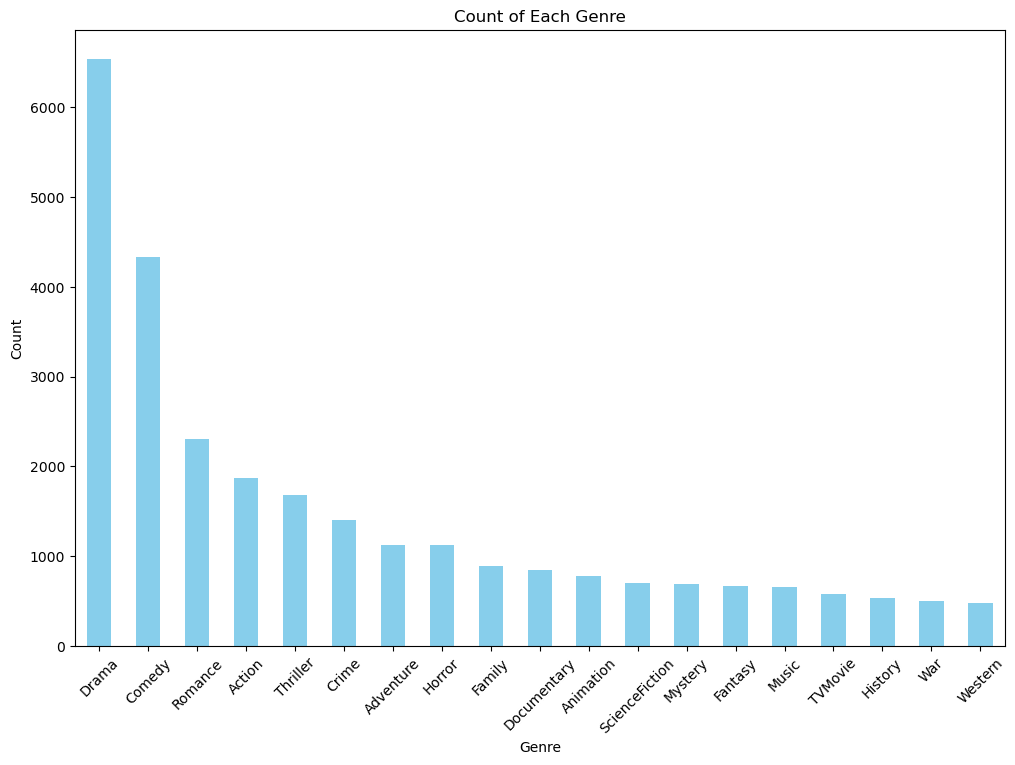

In [37]:
#plotting the number of movies in each genre
plt.figure(figsize=(12, 8))
genre_counts.plot.bar(color='skyblue')
plt.title('Count of Each Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

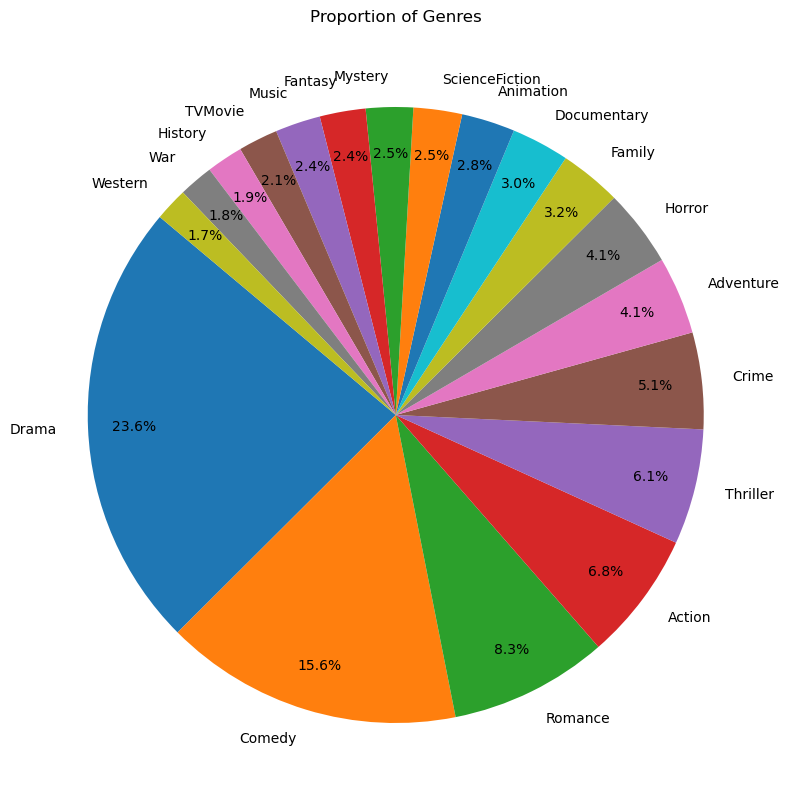

In [38]:
#plotting the distribution of genres in a pie chart
plt.figure(figsize=(12, 10))
genre_counts.plot.pie(autopct='%1.1f%%', startangle=140, pctdistance=0.85, labeldistance=1.1)
plt.title('Proportion of Genres')
plt.ylabel('')
plt.show()